# Cont. on Applications of PostGIS Functions
In this notebook, we will look at applications of our PostGIS data and functions in machine learning

In [497]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

First, let's look back at our OSM and GADM datasets:

In [498]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [499]:
# Check contents of ph_point
df = pd.read_sql('''
SELECT *
FROM ph_point
LIMIT 100
''',conn)
df

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,4332833465,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000EBA7FFAC790C5C4030963325A3B0...
1,5127953795,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E610000087527B116D105C4055FC3ACB87BB...
2,4332833991,None,None,None,None,None,None,None,ferry_terminal,None,...,None,None,None,None,None,None,None,None,None,0101000020E610000022CC481861105C40F863A428E1BB...
3,2645876983,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E61000007E1EA33C73105C40505A136635BC...
4,2645876976,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000060BCCAF8B105C40EFE192E34EBD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4886991329,None,None,None,None,None,None,None,None,None,...,None,communication,None,None,None,None,None,None,None,0101000020E61000003A5563AEB1EF5D409D966945E510...
96,332020043,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000A47213B5B4EF5D40EFC0A5081511...
97,4886991379,None,None,None,None,None,None,None,shelter,None,...,None,None,None,None,None,None,None,None,None,0101000020E61000009D195822ABEF5D40E95F3711A211...
98,332020056,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000D0036910B0EF5D409981CAF8F711...


In [500]:
df

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,4332833465,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000EBA7FFAC790C5C4030963325A3B0...
1,5127953795,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E610000087527B116D105C4055FC3ACB87BB...
2,4332833991,None,None,None,None,None,None,None,ferry_terminal,None,...,None,None,None,None,None,None,None,None,None,0101000020E610000022CC481861105C40F863A428E1BB...
3,2645876983,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E61000007E1EA33C73105C40505A136635BC...
4,2645876976,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000060BCCAF8B105C40EFE192E34EBD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4886991329,None,None,None,None,None,None,None,None,None,...,None,communication,None,None,None,None,None,None,None,0101000020E61000003A5563AEB1EF5D409D966945E510...
96,332020043,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000A47213B5B4EF5D40EFC0A5081511...
97,4886991379,None,None,None,None,None,None,None,shelter,None,...,None,None,None,None,None,None,None,None,None,0101000020E61000009D195822ABEF5D40E95F3711A211...
98,332020056,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0101000020E6100000D0036910B0EF5D409981CAF8F711...


In [501]:
# Check the contents of gadm.ph
df2 = pd.read_sql('''
SELECT *
FROM gadm.ph
LIMIT 100
''',conn)
df2

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,0106000020E610000001000000010300000001000000C7...
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,0106000020E6100000010000000103000000010000001F...
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,0106000020E61000000100000001030000000100000072...
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,0106000020E6100000010000000103000000010000000F...
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,0106000020E6100000010000000103000000010000001C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,81,PHL,Philippines,PHL.5_1,Albay,None,PHL.5.10_1,Malilipot,None,None,Bayan|Munisipyo,Municipality,50509,PH.AL.ML,0106000020E61000000200000001030000000100000084...
96,82,PHL,Philippines,PHL.5_1,Albay,None,PHL.5.11_1,Malinao,None,None,Bayan|Munisipyo,Municipality,50510,PH.AL.ML,0106000020E610000001000000010300000001000000CE...
97,83,PHL,Philippines,PHL.5_1,Albay,None,PHL.5.12_1,Manito,None,None,Bayan|Munisipyo,Municipality,50511,PH.AL.MN,0106000020E610000001000000010300000001000000F2...
98,85,PHL,Philippines,PHL.5_1,Albay,None,PHL.5.14_1,Pio Duran,None,None,Bayan|Munisipyo,Municipality,50513,PH.AL.PO,0106000020E61000000100000001030000000100000097...


In [502]:
#Let's filter out the amenities. Consider only top 20 amenities
df3 = pd.read_sql("""
SELECT amenity, COUNT(amenity)
FROM ph_point
GROUP BY amenity
ORDER BY count DESC
LIMIT 20
""", conn)
df3

,amenity,count
0,restaurant,8869
1,school,5853
2,bank,5369
3,fast_food,5249
4,place_of_worship,4652
5,fuel,3799
6,pharmacy,2956
7,cafe,2171
8,parking,1661
9,bar,1177


#### Class Exercise
Count the number of 'restaurants' inside each city of 'Metropolitan Manila'

In [503]:
#Code Here
pd.read_sql('''
SELECT g.name_2 as city, COUNT(*) as restaurant
FROM gadm.ph AS g
JOIN public.ph_point AS p ON ST_within(p.way,g.geom)
WHERE g.name_1 = 'Metropolitan Manila' AND p.amenity = 'restaurant'
GROUP BY city
ORDER BY restaurant DESC
''',conn)

,city,restaurant
0,Quezon City,741
1,Makati City,678
2,Manila,263
3,Pasig City,218
4,Parañaque,166
5,Muntinlupa,161
6,Pasay City,150
7,San Juan,118
8,Marikina,102
9,Las Piñas,99


#### Exercise
Create a table containing the number of each of the top 20 amenity types within each city/municipality in Metro Manila

| Province | City | restaurant | school | ... |

In [504]:
#Code Here
df = pd.read_sql("""
SELECT amenity, COUNT(amenity)
FROM ph_point
GROUP BY amenity
ORDER BY count DESC
LIMIT 40
""", conn)
df

,amenity,count
0,restaurant,8869
1,school,5853
2,bank,5369
3,fast_food,5249
4,place_of_worship,4652
5,fuel,3799
6,pharmacy,2956
7,cafe,2171
8,parking,1661
9,bar,1177


In [505]:
amenities =  df.amenity.to_list()
amenities

['restaurant',
 'school',
 'bank',
 'fast_food',
 'place_of_worship',
 'fuel',
 'pharmacy',
 'cafe',
 'parking',
 'bar',
 'townhall',
 'police',
 'atm',
 'community_centre',
 'bus_station',
 'clinic',
 'shelter',
 'toilets',
 'hospital',
 'post_office',
 'bench',
 'public_building',
 'college',
 'marketplace',
 'kindergarten',
 'fire_station',
 'dentist',
 'car_wash',
 'bureau_de_change',
 'internet_cafe',
 'tricycle_station',
 'doctors',
 'pub',
 'fountain',
 'ferry_terminal',
 'swimming_pool',
 'bicycle_parking',
 'veterinary',
 'taxi',
 'university']

In [506]:
# for i in amenities[1:]:
#     df = df.merge(
#     pd.read_sql(f"""
#     SELECT g.name_2, count(*) as {i}
#     FROM gadm.ph as g
#     JOIN public.ph_point p ON st_within(p.way, g.geom)
#     WHERE g.name_1 = 'Metropolitan Manila' and p.amenity = '{i}'
#     GROUP BY g.name_2
#     """, conn), left_on = 'city', right_on = 'name_2')

In [507]:
tuple(amenities)

('restaurant',
 'school',
 'bank',
 'fast_food',
 'place_of_worship',
 'fuel',
 'pharmacy',
 'cafe',
 'parking',
 'bar',
 'townhall',
 'police',
 'atm',
 'community_centre',
 'bus_station',
 'clinic',
 'shelter',
 'toilets',
 'hospital',
 'post_office',
 'bench',
 'public_building',
 'college',
 'marketplace',
 'kindergarten',
 'fire_station',
 'dentist',
 'car_wash',
 'bureau_de_change',
 'internet_cafe',
 'tricycle_station',
 'doctors',
 'pub',
 'fountain',
 'ferry_terminal',
 'swimming_pool',
 'bicycle_parking',
 'veterinary',
 'taxi',
 'university')

In [508]:
df = pd.read_sql(f'''
SELECT g.name_1 as province,
       g.name_2 as city,
       p.amenity as amenity,
       count(*) as counts
FROM gadm.ph g
JOIN public.ph_point p ON st_within(p.way,g.geom)
WHERE p.amenity IN {tuple(amenities)}
GROUP BY 1,2,3
ORDER BY 4 DESC
''',conn)
df

,province,city,amenity,counts
0,Metropolitan Manila,Quezon City,restaurant,741
1,Metropolitan Manila,Makati City,restaurant,678
2,Metropolitan Manila,Quezon City,bank,471
3,Metropolitan Manila,Quezon City,fast_food,467
4,Metropolitan Manila,Makati City,bank,462
...,...,...,...,...
11877,Davao Oriental,Boston,townhall,1
11878,Tarlac,Tarlac City,fire_station,1
11879,Capiz,Jamindan,hospital,1
11880,Benguet,Mankayan,parking,1


Now let's create one using the entire dataset:

In [509]:
#Code Here
df = pd.read_sql(f'''
SELECT g.name_1 as province,
       g.name_2 as city,
       p.amenity as amenity,
       count(*) as counts
FROM gadm.ph g
JOIN public.ph_point p ON st_within(p.way,g.geom)
WHERE p.amenity IN {tuple(amenities)}
GROUP BY 1,2,3
ORDER BY 4 DESC
''',conn)
df

,province,city,amenity,counts
0,Metropolitan Manila,Quezon City,restaurant,741
1,Metropolitan Manila,Makati City,restaurant,678
2,Metropolitan Manila,Quezon City,bank,471
3,Metropolitan Manila,Quezon City,fast_food,467
4,Metropolitan Manila,Makati City,bank,462
...,...,...,...,...
11877,Agusan del Sur,Bayugan City,college,1
11878,Nueva Ecija,Peñaranda,kindergarten,1
11879,Tarlac,Tarlac City,fountain,1
11880,Occidental Mindoro,Calintaan,police,1


In [510]:
pivot = pd.pivot_table(df, values='counts', index=['province','city'], columns=['amenity'])
pivot.reset_index(inplace=True)
pivot.columns.name = None
pivot

,province,city,atm,bank,bar,bench,bicycle_parking,bureau_de_change,bus_station,cafe,...,restaurant,school,shelter,swimming_pool,taxi,toilets,townhall,tricycle_station,university,veterinary
0,Abra,Bangued,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abra,Manabo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abra,San Juan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abra,San Quintin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agusan del Norte,Buenavista,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Zamboanga del Sur,Margosatubig,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1354,Zamboanga del Sur,Molave,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355,Zamboanga del Sur,Pagadian City,1.0,13.0,1.0,NaN,NaN,NaN,3.0,1.0,...,2.0,52.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1356,Zamboanga del Sur,San Miguel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN


### Import our Attribute Data

In [511]:
#Check the contents of the attribute data
targets = pd.read_csv('financial_pop.csv')
targets

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,48163.0,74.045920,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,3573.0,0.115667,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,17115.0,1.736411,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,2501.0,0.273689,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,2088.0,0.643801,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,15.448920,5.801291,165.833472,116.742464,49.091008,0.0,30.375550,40.505854,29.068270,Camarines Sur,Tinambac
1623,NaN,3.881869,2.064453,59.176489,50.055428,9.121061,0.0,0.000000,0.000000,33.135557,Camarines Sur,Camaligan
1624,NaN,4.867135,2.615213,144.692431,100.076373,44.616059,0.0,0.502352,0.502352,106.534443,Camarines Sur,Lagonoy
1625,NaN,5.261260,1.360630,95.936120,61.682604,34.253516,0.0,13.592182,13.949405,40.976700,Camarines Sur,Balatan


In [512]:
#Lets merge the population column to our data
dataset = pd.merge(pivot, targets[['pop','shp_province','shp_municipality']],
                   how='left',
                   left_on = ['province','city'],
                   right_on = ['shp_province','shp_municipality'])
dataset = dataset.fillna(0)
dataset

,province,city,atm,bank,bar,bench,bicycle_parking,bureau_de_change,bus_station,cafe,...,swimming_pool,taxi,toilets,townhall,tricycle_station,university,veterinary,pop,shp_province,shp_municipality
0,Abra,Bangued,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48163.0,Abra,Bangued
1,Abra,Manabo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10761.0,Abra,Manabo
2,Abra,San Juan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9867.0,Abra,San Juan
3,Abra,San Quintin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5438.0,Abra,San Quintin
4,Agusan del Norte,Buenavista,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,61614.0,Agusan del Norte,Buenavista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,Zamboanga del Sur,Margosatubig,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37873.0,Zamboanga del Sur,Margosatubig
1354,Zamboanga del Sur,Molave,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52006.0,Zamboanga del Sur,Molave
1355,Zamboanga del Sur,Pagadian City,1.0,13.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,199060.0,Zamboanga del Sur,Pagadian City
1356,Zamboanga del Sur,San Miguel,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,19205.0,Zamboanga del Sur,San Miguel


**Dropping Population 0 areas**

In [513]:
dataset[dataset['pop'] == 0]

dataset.drop(dataset[dataset['pop'] == 0].index, axis=0, inplace=True)

### Regression Model
We can now use our data in our machine learning model

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Class exercise
Use linear regression to check if we can predict the population using our amenity dataset

In [515]:
# Prepare Features
X = dataset.drop(['province','city','shp_municipality','shp_province','pop'], axis = 1)
X

,atm,bank,bar,bench,bicycle_parking,bureau_de_change,bus_station,cafe,car_wash,clinic,...,restaurant,school,shelter,swimming_pool,taxi,toilets,townhall,tricycle_station,university,veterinary
0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1354,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1355,1.0,13.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,13.0,...,2.0,52.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1356,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0


In [516]:
# Prepare your Target
y = dataset[['pop']]
y

,pop
0,48163.0
1,10761.0
2,9867.0
3,5438.0
4,61614.0
...,...
1353,37873.0
1354,52006.0
1355,199060.0
1356,19205.0


**Splitting**

In [517]:
# Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1337)
lr = LinearRegression().fit(X_train, y_train)

In [518]:
# #Check Accuracy
lr = LinearRegression().fit(X_train, y_train)
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.917161
test set score: 0.843767


### Exercise
Try to have the highest accuracy in predicting the population using our available datasets.
Which feature has the highest importance?

In [519]:
# !pip install optuna 
import optuna

def print_study_results(study):
    best_params = study.best_params
    best_value = study.best_value
    
    print(f'best parameters: \n {best_params}')
    print('-------------------------------')
    print(f'best validation accuracy: \n {best_value}')
    
    return best_params, best_value

summary = {}

#### Lasso

In [520]:

def tune_lasso(X, y):
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Lasso
    from optuna.samplers import TPESampler
    
    def optimize(trial):
        alpha = trial.suggest_float('alpha', 1e-8, 1e4, log=True)
        model = Lasso(alpha=alpha, random_state=1, max_iter=1_000_000)
        
        cval = cross_val_score(model, X, y, cv=8, scoring='r2')
        return np.mean(cval)
        
    study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=1))
    study.optimize(optimize, n_trials=50)
    return study
        

In [521]:
res_lasso = tune_lasso(X_train, y_train)
bp_lasso, bv_lasso = print_study_results(res_lasso)

[I 2021-10-26 03:10:23,241] A new study created in memory with name: no-name-13a58cfe-b281-4367-8921-ce8c37ab3ed6
[I 2021-10-26 03:10:31,236] Trial 0 finished with value: 0.7134059844379738 and parameters: {'alpha': 0.0010098667109352927}. Best is trial 0 with value: 0.7134059844379738.
[I 2021-10-26 03:10:36,326] Trial 1 finished with value: 0.7137639496778476 and parameters: {'alpha': 4.404472688223826}. Best is trial 1 with value: 0.7137639496778476.
[I 2021-10-26 03:10:49,322] Trial 2 finished with value: 0.7134059019804446 and parameters: {'alpha': 1.0031652919837906e-08}. Best is trial 1 with value: 0.7137639496778476.
[I 2021-10-26 03:10:58,635] Trial 3 finished with value: 0.7134059054471557 and parameters: {'alpha': 4.24610638978891e-05}. Best is trial 1 with value: 0.7137639496778476.
[I 2021-10-26 03:11:09,130] Trial 4 finished with value: 0.7134059020267958 and parameters: {'alpha': 5.768603509019636e-07}. Best is trial 1 with value: 0.7137639496778476.
[I 2021-10-26 03:11:

[I 2021-10-26 03:13:38,732] Trial 44 finished with value: 0.7436187178269937 and parameters: {'alpha': 7415.212051581178}. Best is trial 13 with value: 0.7441497930800349.
[I 2021-10-26 03:13:51,322] Trial 45 finished with value: 0.7134059019815178 and parameters: {'alpha': 2.322054241172577e-08}. Best is trial 13 with value: 0.7441497930800349.
[I 2021-10-26 03:13:55,441] Trial 46 finished with value: 0.7148787975391451 and parameters: {'alpha': 18.155062629371393}. Best is trial 13 with value: 0.7441497930800349.
[I 2021-10-26 03:13:58,332] Trial 47 finished with value: 0.7203983946369935 and parameters: {'alpha': 94.61458897269}. Best is trial 13 with value: 0.7441497930800349.
[I 2021-10-26 03:14:03,227] Trial 48 finished with value: 0.7135878396582913 and parameters: {'alpha': 2.222362961768011}. Best is trial 13 with value: 0.7441497930800349.
[I 2021-10-26 03:14:04,622] Trial 49 finished with value: 0.7389928523576957 and parameters: {'alpha': 3690.3938545914375}. Best is trial 

best parameters: 
 {'alpha': 7110.074992566601}
-------------------------------
best validation accuracy: 
 0.7441497930800349


In [522]:
from sklearn.linear_model import Lasso
lasso_test = Lasso(alpha=bp_lasso['alpha'], max_iter=1_000_000, random_state=1)
lasso_test.fit(X_train, y_train)
lasso_train_score = lasso_test.score(X_train, y_train)
lasso_test_score = lasso_test.score(X_test, y_test)
summary['Lasso'] = [lasso_train_score, lasso_test_score]

In [523]:
[lasso_train_score, lasso_test_score]

[0.8925888834415825, 0.7861030718037729]

#### Ridge

In [524]:
def tune_ridge(X, y):
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Ridge
    from optuna.samplers import TPESampler
    
    def optimize(trial):
        alpha = trial.suggest_float('alpha', 1e-8, 1e4, log=True)
        solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag','saga'])
        model = Ridge(alpha=alpha, max_iter=1_000_000, solver=solver)
        
        cval = cross_val_score(model, X, y, cv=8, scoring='r2')
        return np.mean(cval)
        
    study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=1))
    study.optimize(optimize, n_trials=50)
    return study
        

In [525]:
res_ridge = tune_ridge(X_train, y_train)
bp_ridge, bv_ridge = print_study_results(res_ridge)

[I 2021-10-26 03:14:05,034] A new study created in memory with name: no-name-657c3ed4-cfd2-4c0d-8fa7-56ffcd917ecf
[I 2021-10-26 03:14:05,730] Trial 0 finished with value: 0.7134069289725707 and parameters: {'alpha': 0.0010098667109352927, 'solver': 'auto'}. Best is trial 0 with value: 0.7134069289725707.
[I 2021-10-26 03:14:06,533] Trial 1 finished with value: 0.7286637645184091 and parameters: {'alpha': 0.0005770450112666483, 'solver': 'sparse_cg'}. Best is trial 1 with value: 0.7286637645184091.
[I 2021-10-26 03:14:07,233] Trial 2 finished with value: 0.7286134306036101 and parameters: {'alpha': 0.001017788708428267, 'solver': 'sparse_cg'}. Best is trial 1 with value: 0.7286637645184091.
[I 2021-10-26 03:14:08,028] Trial 3 finished with value: 0.7455165813927611 and parameters: {'alpha': 328.60171638317036, 'solver': 'auto'}. Best is trial 3 with value: 0.7455165813927611.
[I 2021-10-26 03:14:08,836] Trial 4 finished with value: 0.7500670795638118 and parameters: {'alpha': 3123.73628

[I 2021-10-26 03:15:05,732] Trial 40 finished with value: 0.713405930974663 and parameters: {'alpha': 2.8510551660605976e-05, 'solver': 'cholesky'}. Best is trial 32 with value: 0.753389632992897.
[I 2021-10-26 03:15:07,996] Trial 41 finished with value: 0.7531155393997767 and parameters: {'alpha': 2.5094723093437796, 'solver': 'saga'}. Best is trial 32 with value: 0.753389632992897.
[I 2021-10-26 03:15:09,919] Trial 42 finished with value: 0.7531228018405424 and parameters: {'alpha': 0.05101810384105723, 'solver': 'saga'}. Best is trial 32 with value: 0.753389632992897.
[I 2021-10-26 03:15:11,972] Trial 43 finished with value: 0.7532241198741468 and parameters: {'alpha': 0.0021664121811560584, 'solver': 'saga'}. Best is trial 32 with value: 0.753389632992897.
[I 2021-10-26 03:15:12,428] Trial 44 finished with value: 0.7337085320290317 and parameters: {'alpha': 0.1511982357545494, 'solver': 'lsqr'}. Best is trial 32 with value: 0.753389632992897.
[I 2021-10-26 03:15:14,512] Trial 45 fi

best parameters: 
 {'alpha': 0.3333249058596117, 'solver': 'saga'}
-------------------------------
best validation accuracy: 
 0.753389632992897


In [526]:
from sklearn.linear_model import Ridge
ridge_test = Ridge(**bp_ridge, max_iter=1_000_000)
ridge_test.fit(X_train, y_train)
ridge_train_score = ridge_test.score(X_train, y_train)
ridge_test_score = ridge_test.score(X_test, y_test)
summary['Ridge'] = [ridge_train_score, ridge_test_score]

In [527]:
[ridge_train_score, ridge_test_score]

[0.8966566297420961, 0.8235533600056826]

#### Results

In [528]:
df_default = pd.DataFrame(summary, index=['train_r2', 'test_r2']).T
df_default

,train_r2,test_r2
Lasso,0.892589,0.786103
Ridge,0.896657,0.823553


### Feature Engineering

In [529]:
#Code Here
pd.read_sql(f'''
SELECT g.name_1 as province,
       g.name_2 as city,
       p.amenity as amenity,
       count(*) as counts
FROM gadm.ph g
JOIN public.ph_point p ON st_within(p.way,g.geom)
WHERE p.amenity IN {tuple(amenities)}
GROUP BY 1,2,3
ORDER BY 4 DESC
''',conn)


,province,city,amenity,counts
0,Metropolitan Manila,Quezon City,restaurant,741
1,Metropolitan Manila,Makati City,restaurant,678
2,Metropolitan Manila,Quezon City,bank,471
3,Metropolitan Manila,Quezon City,fast_food,467
4,Metropolitan Manila,Makati City,bank,462
...,...,...,...,...
11877,Davao Oriental,Boston,townhall,1
11878,Tarlac,Tarlac City,fire_station,1
11879,Capiz,Jamindan,hospital,1
11880,Benguet,Mankayan,parking,1


In [530]:
#Code Here
df_area = pd.read_sql(f'''
SELECT g.name_1 as province, g.name_2 as city, st_area(st_transform(g.geom,3123)) as area
FROM gadm.ph g
''',conn)
df_area

,province,city,area
0,Abra,Bangued,1.236428e+08
1,Abra,Boliney,1.826286e+08
2,Abra,Bucay,1.043794e+08
3,Abra,Bucloc,5.126731e+07
4,Abra,Daguioman,9.726907e+07
...,...,...,...
1642,Zamboanga Sibugay,Naga,1.644362e+08
1643,Zamboanga Sibugay,Talusan,5.070284e+07
1644,Zamboanga Sibugay,Olutanga,6.883845e+07
1645,Zamboanga Sibugay,Payao,1.955237e+08


In [531]:
import numpy as np
df_area['area'] = df_area['area'].apply(np.log)
df_area

,province,city,area
0,Abra,Bangued,18.632907
1,Abra,Boliney,19.022965
2,Abra,Bucay,18.463543
3,Abra,Bucloc,17.752564
4,Abra,Daguioman,18.392992
...,...,...,...
1642,Zamboanga Sibugay,Naga,18.918033
1643,Zamboanga Sibugay,Talusan,17.741493
1644,Zamboanga Sibugay,Olutanga,18.047273
1645,Zamboanga Sibugay,Payao,19.091192


<AxesSubplot:ylabel='Frequency'>

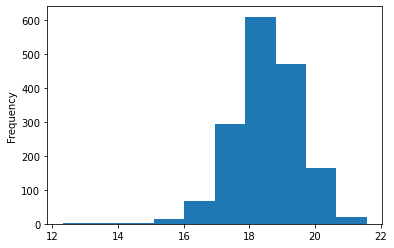

In [532]:
df_area['area'].plot(kind='hist')

In [533]:
new_dataset = dataset.merge(df_area, how='left', on=['province', 'city'])
new_dataset

,province,city,atm,bank,bar,bench,bicycle_parking,bureau_de_change,bus_station,cafe,...,taxi,toilets,townhall,tricycle_station,university,veterinary,pop,shp_province,shp_municipality,area
0,Abra,Bangued,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48163.0,Abra,Bangued,18.632907
1,Abra,Manabo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10761.0,Abra,Manabo,18.237770
2,Abra,San Juan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9867.0,Abra,San Juan,17.983664
3,Abra,San Quintin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5438.0,Abra,San Quintin,17.946333
4,Agusan del Norte,Buenavista,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,61614.0,Agusan del Norte,Buenavista,19.729229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Zamboanga del Sur,Margosatubig,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,37873.0,Zamboanga del Sur,Margosatubig,18.278331
1316,Zamboanga del Sur,Molave,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52006.0,Zamboanga del Sur,Molave,17.932782
1317,Zamboanga del Sur,Pagadian City,1.0,13.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,199060.0,Zamboanga del Sur,Pagadian City,19.450259
1318,Zamboanga del Sur,San Miguel,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,19205.0,Zamboanga del Sur,San Miguel,18.354460


### Trying out New Dataset

In [534]:
# Prepare Features
drop_list = ['province','city','shp_municipality','shp_province','pop']

X = new_dataset.drop(drop_list, axis = 1)


In [535]:
# Prepare your Target
y = new_dataset[['pop']]
y

,pop
0,48163.0
1,10761.0
2,9867.0
3,5438.0
4,61614.0
...,...
1315,37873.0
1316,52006.0
1317,199060.0
1318,19205.0


In [536]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1337)


MMS = MinMaxScaler()
X_train = MMS.fit_transform(X_train)
X_test = MMS.transform(X_test)
new_summary = {}

#### Ridge

In [537]:
res_ridge2 = tune_ridge(X_train, y_train)
bp_ridge2, bv_ridge2 = print_study_results(res_ridge2)

[I 2021-10-26 03:15:22,806] A new study created in memory with name: no-name-cd53f9a8-33f7-425c-8d90-4b111f9e4717
[I 2021-10-26 03:15:23,328] Trial 0 finished with value: 0.7169508297524664 and parameters: {'alpha': 0.0010098667109352927, 'solver': 'auto'}. Best is trial 0 with value: 0.7169508297524664.
[I 2021-10-26 03:15:23,937] Trial 1 finished with value: 0.7265983495937461 and parameters: {'alpha': 0.0005770450112666483, 'solver': 'sparse_cg'}. Best is trial 1 with value: 0.7265983495937461.
[I 2021-10-26 03:15:24,625] Trial 2 finished with value: 0.7273086607244954 and parameters: {'alpha': 0.001017788708428267, 'solver': 'sparse_cg'}. Best is trial 2 with value: 0.7273086607244954.
[I 2021-10-26 03:15:25,223] Trial 3 finished with value: 0.169190483978572 and parameters: {'alpha': 328.60171638317036, 'solver': 'auto'}. Best is trial 2 with value: 0.7273086607244954.
[I 2021-10-26 03:15:25,733] Trial 4 finished with value: 0.004455093838806892 and parameters: {'alpha': 3123.7362

[I 2021-10-26 03:15:59,809] Trial 40 finished with value: 0.7557004413316646 and parameters: {'alpha': 0.6551919289078638, 'solver': 'saga'}. Best is trial 32 with value: 0.7692078315219435.
[I 2021-10-26 03:16:00,950] Trial 41 finished with value: 0.7686023371224743 and parameters: {'alpha': 0.1274407036356194, 'solver': 'saga'}. Best is trial 32 with value: 0.7692078315219435.
[I 2021-10-26 03:16:02,279] Trial 42 finished with value: 0.7691810344531744 and parameters: {'alpha': 0.0555482078236108, 'solver': 'saga'}. Best is trial 32 with value: 0.7692078315219435.
[I 2021-10-26 03:16:03,265] Trial 43 finished with value: 0.7666807894812839 and parameters: {'alpha': 0.20344094828523118, 'solver': 'saga'}. Best is trial 32 with value: 0.7692078315219435.
[I 2021-10-26 03:16:03,629] Trial 44 finished with value: 0.7472488999959929 and parameters: {'alpha': 1.3881524946543762, 'solver': 'lsqr'}. Best is trial 32 with value: 0.7692078315219435.
[I 2021-10-26 03:16:05,477] Trial 45 finishe

best parameters: 
 {'alpha': 0.0747661840504289, 'solver': 'saga'}
-------------------------------
best validation accuracy: 
 0.7692078315219435


In [538]:
from sklearn.linear_model import Ridge
ridge_test2 = Ridge(alpha=bp_ridge2['alpha'], max_iter=1_000_000, solver='sag')
ridge_test2.fit(X_train, y_train)
ridge_train_score2 = ridge_test2.score(X_train, y_train)
ridge_test_score2 = ridge_test2.score(X_test, y_test)
new_summary['Ridge'] = [ridge_train_score2, ridge_test_score2]
new_summary

{'Ridge': [0.9168618913007583, 0.8241499527402654]}

<AxesSubplot:>

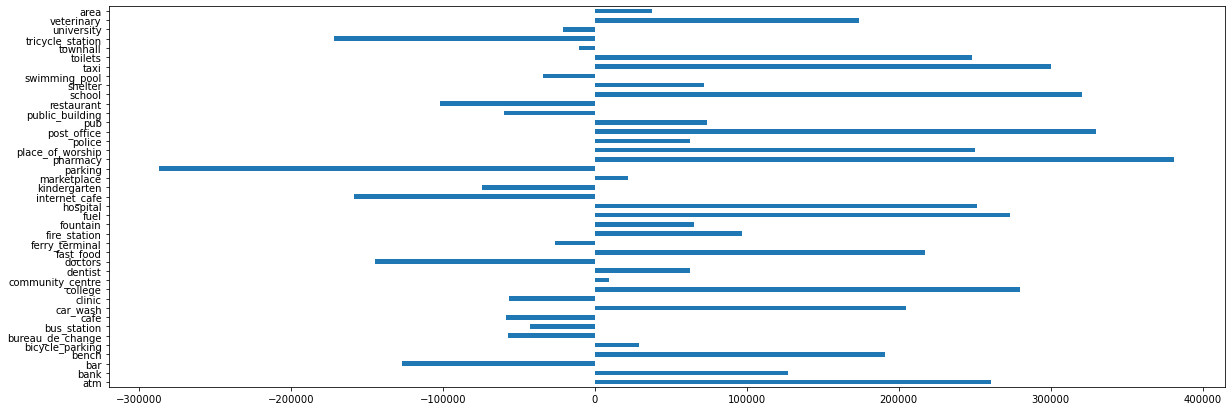

In [539]:
fig, ax = plt.subplots(figsize=(20,7))
pd.Series(ridge_test2.coef_.ravel(), index=X.columns).plot(kind='barh', ax=ax)
# ax.axvline(233551.64834295)

#### Lasso

In [540]:
res_lasso2 = tune_lasso(X_train, y_train)
bp_lasso2, bv_lasso2 = print_study_results(res_lasso2)

[I 2021-10-26 03:16:09,934] A new study created in memory with name: no-name-3e2fb597-c5ef-41e0-bbda-dcb2007bd6f8
[I 2021-10-26 03:16:15,634] Trial 0 finished with value: 0.7140676790892027 and parameters: {'alpha': 0.0010098667109352927}. Best is trial 0 with value: 0.7140676790892027.
[I 2021-10-26 03:16:17,331] Trial 1 finished with value: 0.7321584783826351 and parameters: {'alpha': 4.404472688223826}. Best is trial 1 with value: 0.7321584783826351.
[I 2021-10-26 03:16:27,336] Trial 2 finished with value: 0.714062896456403 and parameters: {'alpha': 1.0031652919837906e-08}. Best is trial 1 with value: 0.7321584783826351.
[I 2021-10-26 03:16:34,133] Trial 3 finished with value: 0.7140630984814322 and parameters: {'alpha': 4.24610638978891e-05}. Best is trial 1 with value: 0.7321584783826351.
[I 2021-10-26 03:16:42,924] Trial 4 finished with value: 0.7140628991274935 and parameters: {'alpha': 5.768603509019636e-07}. Best is trial 1 with value: 0.7321584783826351.
[I 2021-10-26 03:16:5

[I 2021-10-26 03:18:28,135] Trial 44 finished with value: 0.7508181112391132 and parameters: {'alpha': 347.34096896063977}. Best is trial 41 with value: 0.7516757976073503.
[I 2021-10-26 03:18:28,737] Trial 45 finished with value: 0.6841832819929616 and parameters: {'alpha': 1298.0322496411104}. Best is trial 41 with value: 0.7516757976073503.
[I 2021-10-26 03:18:29,433] Trial 46 finished with value: 0.7414116907143491 and parameters: {'alpha': 115.78787455070237}. Best is trial 41 with value: 0.7516757976073503.
[I 2021-10-26 03:18:32,832] Trial 47 finished with value: 0.7149093706748335 and parameters: {'alpha': 0.18001229167723687}. Best is trial 41 with value: 0.7516757976073503.
[I 2021-10-26 03:18:33,427] Trial 48 finished with value: 0.7513524400839585 and parameters: {'alpha': 334.0741180141693}. Best is trial 41 with value: 0.7516757976073503.
[I 2021-10-26 03:18:43,433] Trial 49 finished with value: 0.714062896840798 and parameters: {'alpha': 9.212476962976134e-08}. Best is t

best parameters: 
 {'alpha': 18.45396488010546}
-------------------------------
best validation accuracy: 
 0.7516757976073503


In [541]:
from sklearn.linear_model import Lasso
lasso_test2 = Lasso(alpha=bp_lasso2['alpha'], max_iter=1_000_000, random_state=1)
lasso_test2.fit(X_train, y_train)
lasso_train_score2 = lasso_test2.score(X_train, y_train)
lasso_test_score2 = lasso_test2.score(X_test, y_test)
new_summary['Lasso'] = [lasso_train_score2, lasso_test_score2]
new_summary

{'Ridge': [0.9168618913007583, 0.8241499527402654],
 'Lasso': [0.9170096433749535, 0.8273066786432131]}

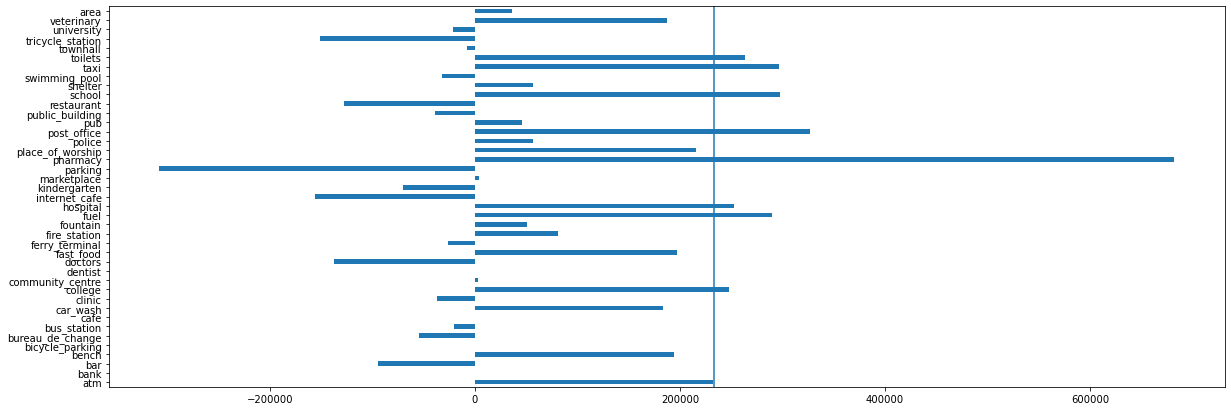

In [550]:
fig, ax = plt.subplots(figsize=(20,7))
pd.Series(lasso_test2.coef_, index=X.columns).plot(kind='barh', ax=ax)
ax.axvline(233551.64834295)

#### Results

In [543]:
pd.DataFrame(new_summary, index=['train_score', 'test_score']).T

,train_score,test_score
Ridge,0.916862,0.824150
Lasso,0.917010,0.827307


In [544]:
lr = LinearRegression().fit(X_train, y_train)
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.918522
test set score: 0.850396


In [552]:
lr.coef_.ravel()

array([ 245964.83498536,   88229.59027358, -100862.17309314,
        246715.49712054,    2266.86312426,  -87438.00514013,
       -103466.75707871,  -14360.89325356,  174011.93992529,
        -88523.5430015 ,  247723.59394825,     711.57565937,
         38493.27165162, -165353.73349026,  489913.09192697,
        -33915.45203318,   84231.99929149,   75876.44888609,
        296265.18868941,  262351.3975592 , -161791.86307427,
        -74531.36335256,    4349.43173278, -326108.94633199,
        675759.92627656,  256131.0179499 ,   53620.29268203,
        350685.43446378,  106769.19599984,  -67241.7447502 ,
       -538504.65400645,  341169.11954557,   79392.08186518,
        -40576.36356966,  306835.35416209,  293307.65428759,
        -13524.27652656, -196833.84782589,   -2106.0093405 ,
        185243.62151733,   38596.01481245])

<AxesSubplot:>

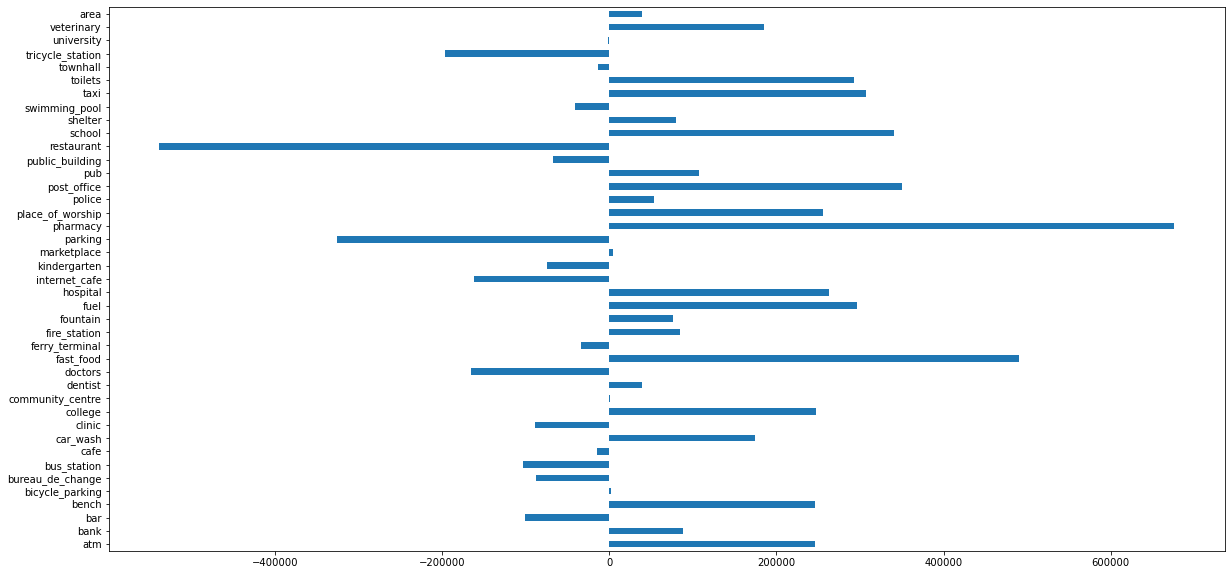

In [557]:
fig, ax = plt.subplots(figsize=(20,10))
pd.Series(lr.coef_.ravel(), index=X.columns).plot(kind='barh', ax=ax)
# ax.axvline(233551.64834295)

#### Discussion

By adding the top 40 amenities in the scope of the model, removing rows that had 0 population and adding the log of the area measurement, the base model (linear regression) improved from a test score of 0.72 to a 0.85 r-squared. There were also attempts to use regularized linear models like lasso and ridge to improve the metric. However, the base model performed better than the regularized ones. Admittingly, a better model-tuning process and a more sophisticated feature-engineering process could have been done by exploring the database for other possible predictors that could improve the predictions of the model.

Looking at the coefficients of the linear regression model, it appears that pharmacies is a strong predictor of population. This means that the number of pharmacies are correlated with the population of the area. On the other hand, the number of restaurants are negatively correlated with the population of the area. It seems a bit weird that the more restaurants there are, the lesser the population.

Another cool insight is the next largest positive coefficient is that of the fast food amentity. This one is no surprise and very intuitive. However, it seems unsettling knowing that the model had a huge negative coefficient for restaurants, but a huge positive coefficient for fast food places. Both amenities are food service establishments, but why are these two features not on the same side in terms of contribution?

Last thing I want to highlight is that the area measurement has a positive coefficient but is relatively small in magnitude. This inidicates that an area could be large but it does not necessarily mean that the area is more populated. 